# Разбор основных возможностей библиотеки

In [65]:
from IPython.display import HTML
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Датасет с полетами:

In [66]:
df = pd.pivot_table(data=sns.load_dataset("flights"),
                    index='month',
                    values='passengers',
                    columns='year')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


## `heatmap`

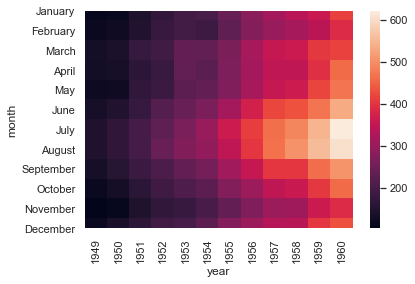

In [67]:
sns.heatmap(df)

### [Настройки палитры:](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html)

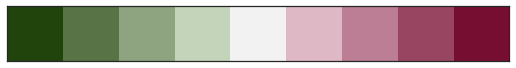

In [68]:
sns.palplot(sns.diverging_palette(119, 0, s=90, l=25, n=9))

In [69]:
cmap = sns.diverging_palette(119, 0, s=90, l=25, n=9, as_cmap=True)

`center` can be used to indicate at which numeric value to use the center of the colormap. Above we see most of the map using blues, so by setting the value of `center` equal to the midpoint of the data then we can create a map where there are more equal amounts of red and blue shades.

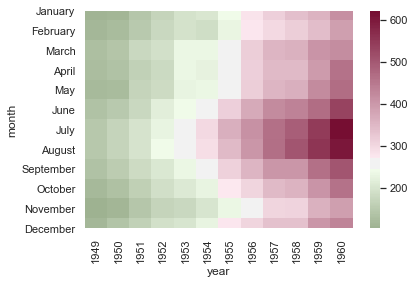

In [70]:
midpoint = (df.values.max() - df.values.min()) / 2
sns.heatmap(df, cmap=cmap, center=midpoint)

Adjust the lower and upper contrast bounds with `vmin` and `vmax`. Everything below `vmin` will be the same color. Likewise for above `vmax`.

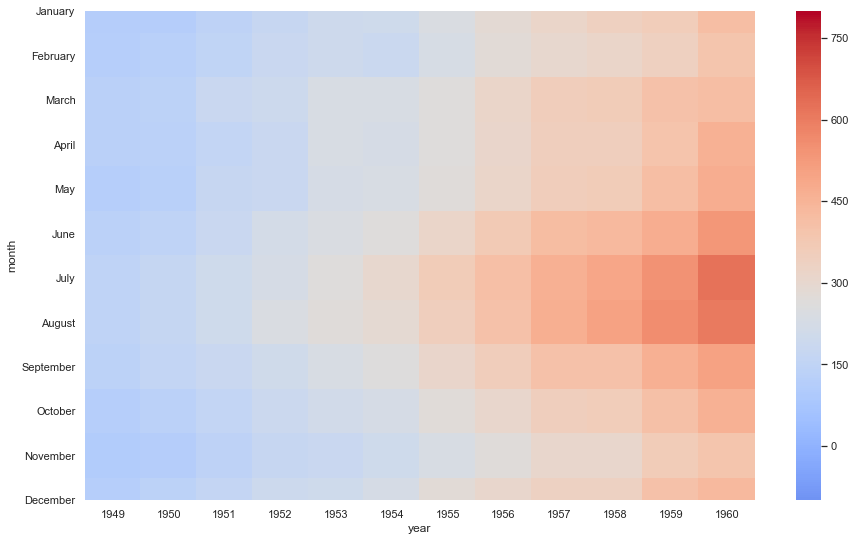

In [71]:
plt.figure(figsize=(15,9))

midpoint = (df.values.max() - df.values.min()) / 2

sns.heatmap(df, cmap='coolwarm', center=midpoint, vmin=-100, vmax=800)

The format of the annotation can be changed with `fmt` – here I’ll change from the default scientific notation to one decimal precision.


Any other parameters for the text, such as the font size, can be passed with `annot_kws`.

[#92 Control color in seaborn heatmaps](https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/)

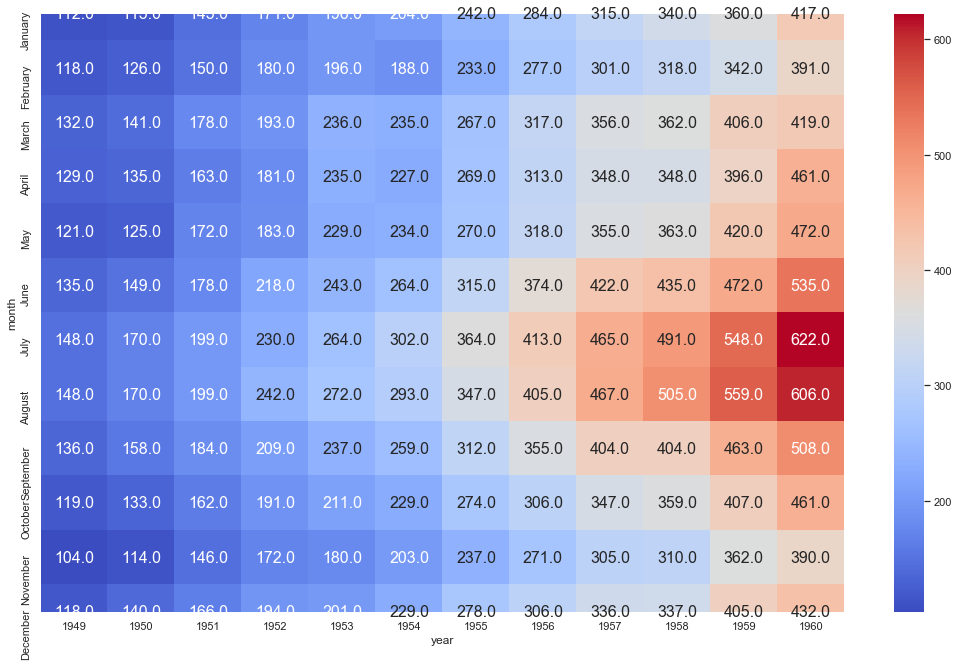

In [74]:
plt.figure(figsize=(18,11))

p = sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f",annot_kws={'size':16})
p

Подробная техника настройки всех атрибутов [source](http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/).

Text(5, 12.3, 'Heat Map')

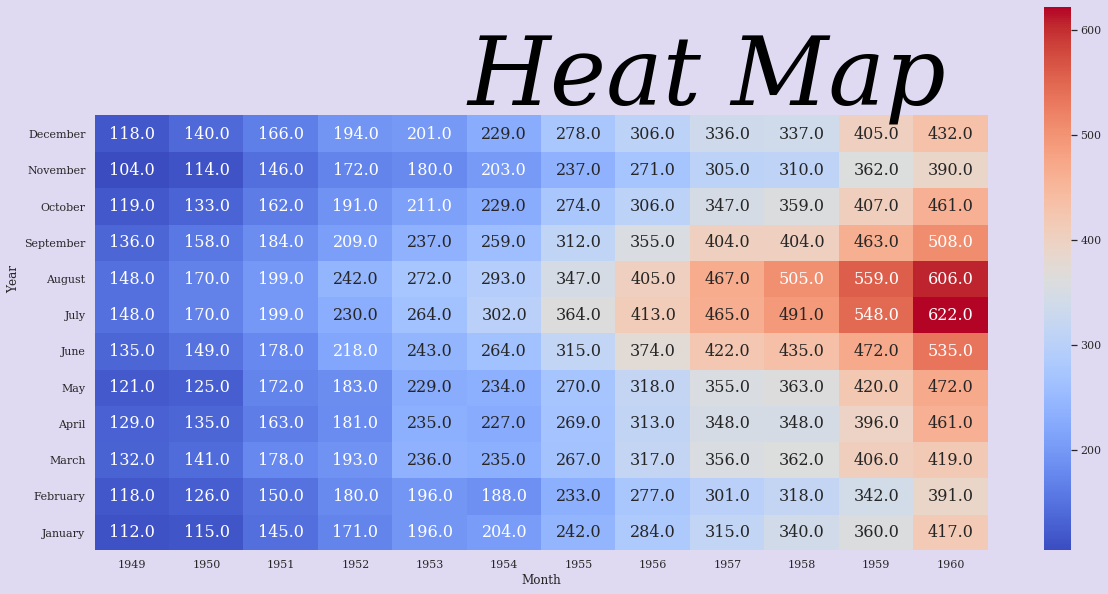

In [75]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fig, ax = plt.subplots(1)
p = sns.heatmap(df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                ax=ax)
plt.xlabel('Month')
plt.ylabel('Year')
ax.set_ylim((0,15))
plt.text(5,12.3, "Heat Map", fontsize = 95, color='Black', fontstyle='italic')

`heatmap` в  `sns` быстрое и наглядное решение для визуализации корреляции.

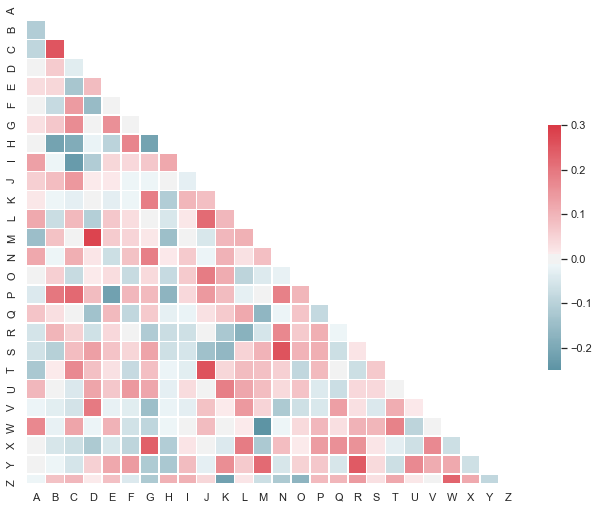

In [28]:
from string import ascii_letters

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Напоминалка по сохранению:

In [95]:
# format to save the files
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

**Save and read process:**

In [ ]:
# fig.savefig('test.png', transparent=False, dpi=180, bbox_inches="tight")
# from IPython.display import Image
# Image('test.png')

## [More About Histogram](https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/), and litlle part with `sns` here:

If you wish to have both the histogram and densities in the same plot, the seaborn package (imported as sns) allows you to do that via the `distplot()`. Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

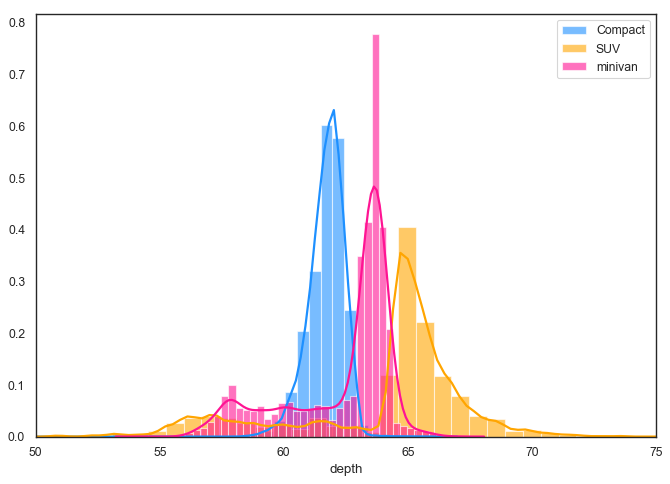

In [91]:
sns.set_style("white")

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(x2, color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(50,75)
plt.legend();

The below example shows how to draw the histogram and densities `(distplot)` in facets.

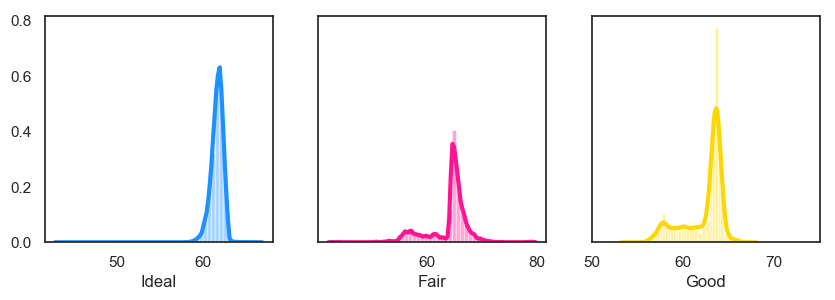

In [93]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')
x1 = df.loc[df.cut=='Ideal', ['depth']]
x2 = df.loc[df.cut=='Fair', ['depth']]
x3 = df.loc[df.cut=='Good', ['depth']]

# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Ideal')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Fair')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='Good')
plt.xlim(50,75);

In [11]:
# saving
# fig.savefig('diamonds.png')

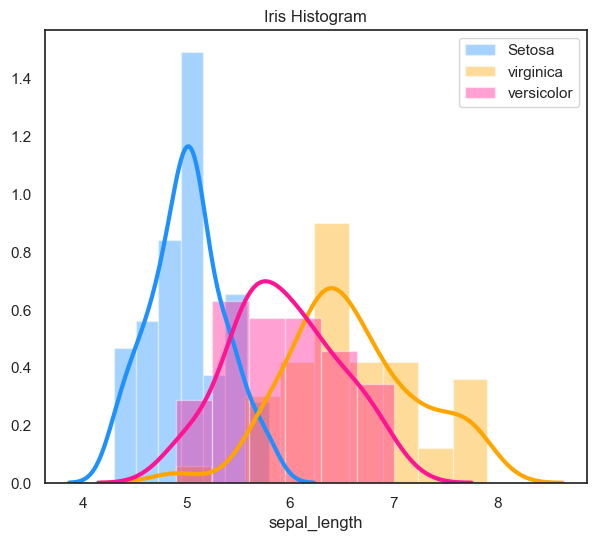

In [94]:
# Solution

df = sns.load_dataset('iris')

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.species=='setosa', "sepal_length"] , color="dodgerblue", label="Setosa")
sns.distplot( df.loc[df.species=='virginica', "sepal_length"] , color="orange", label="virginica")
sns.distplot( df.loc[df.species=='versicolor', "sepal_length"] , color="deeppink", label="versicolor")

plt.title('Iris Histogram')
plt.legend();

## Точечные графики

### `scatterplot`

[Источник раздела](https://www.marsja.se/how-to-make-a-scatter-plot-in-python-using-seaborn/)

[Параллельно посмотрим как управлять размерами фигур](https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib)

In [29]:
data = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv'
df = pd.read_csv(data, index_col=0)

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


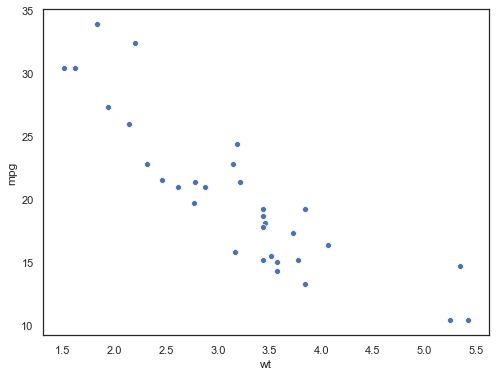

In [55]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='wt', y='mpg', data=df)

[[<matplotlib.axis.YTick at 0x1f663fbdbe0>,

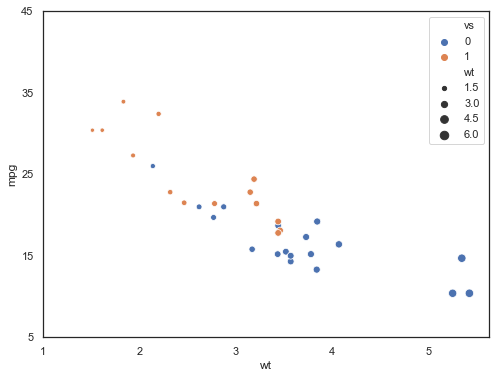

In [56]:
plt.figure(figsize=(8,6))

ax = sns.scatterplot(x='wt',
                     y='mpg',
                     size='wt', 
                     hue='vs',
                     data=df)
ax.set(xticks=np.arange(1, 6, 1),
      yticks=np.arange(5, 50, 10))

### `implot`

The reason for this is that the higher level plotting functions in seaborn (what the documentation calls Figure-level interfaces) have a different way of managing size, largely due to the fact that the often produce multiple subplots. To set the size when using `catplot()` or `relplot()` (`also pairplot()`, `lmplot()` and `jointplot()`), use the `height` keyword to control the size and the `aspect` keyword to control the shape:

<Figure size 864x576 with 0 Axes>

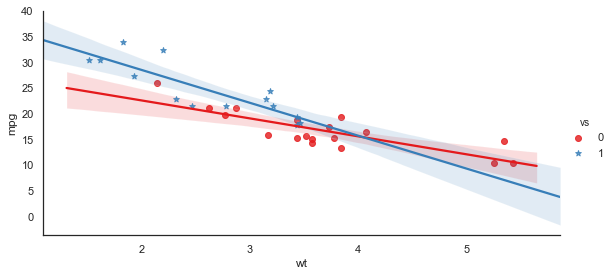

In [61]:
plt.figure(figsize=(12,8))
sns.lmplot(x='wt', y='mpg',
           hue='vs',
           palette="Set1", markers=['o', '*'], data=df,
           height=4, # make the plot 5 units high
           aspect=2)

### 'regplot' and 'kdeplot'

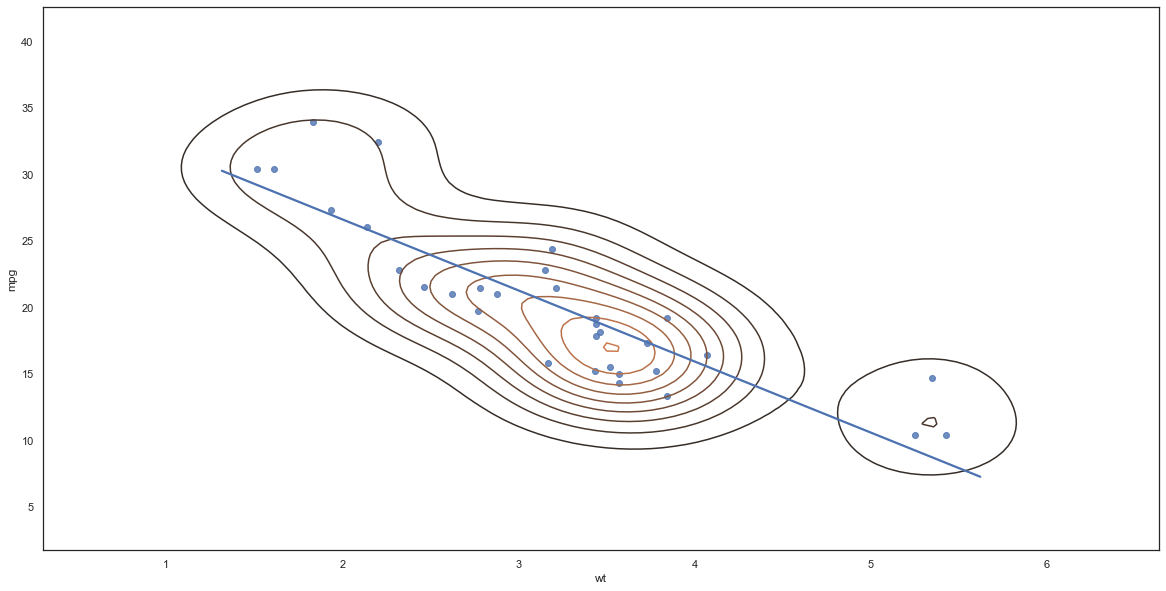

In [62]:
sns.regplot(x='wt', y='mpg',
            ci=None, data=df)
sns.kdeplot(df.wt, df.mpg)

### `pairplot`

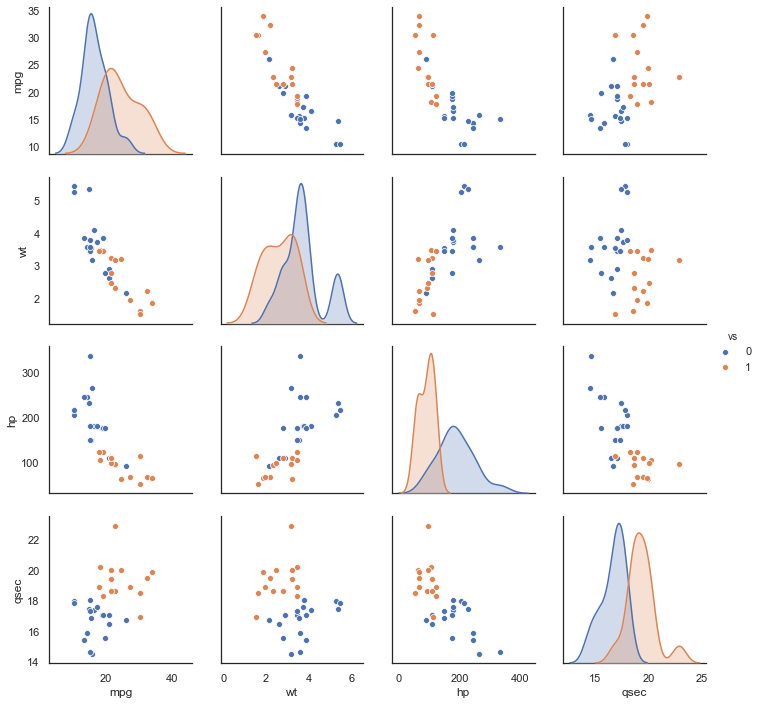

In [63]:
cols = ['mpg', 'wt', 'hp', 'qsec']
sns.pairplot(df, vars=cols, hue='vs')

## [All charts here](https://python-graph-gallery.com/all-charts/)